### Problem 1: Convolution by Hand ###

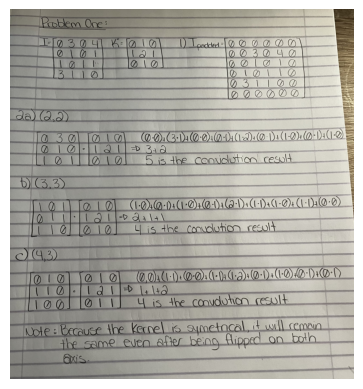

In [1]:
# Read convolution math image
import matplotlib.pyplot as plt
images_path = './images/'
convolution_math_image = plt.imread(images_path + 'convolution_math.jpeg')
plt.imshow(convolution_math_image)
plt.axis('off')  # Hide axis
plt.show()

### Problem 2: Understanding Noinse ###

Noise in images refers to random variations that appear on an image, such as increased brightness or color distortions, which reduce the overall quality. Examples include Gaussian Noise, which looks like random variations of brightness spread evenly across the image which is often caused by sensor or electronic interference, and Salt-and-Pepper Noise, which appears as randomly scattered black and white pixels and is often due to transmission errors or faulty sensors.

Noise can originate from many sources. Environmental factors such as poor lighting or dust, transmission errors when an image is corrupted during transfer, electronic interference from unstable power supply, and processing errors during digitization, compression, or enhancement can all introduce noise into images.

### Problem 3: Implementing Gamma Correction ###

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interactive, fixed, widgets
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

images_path = './images/'

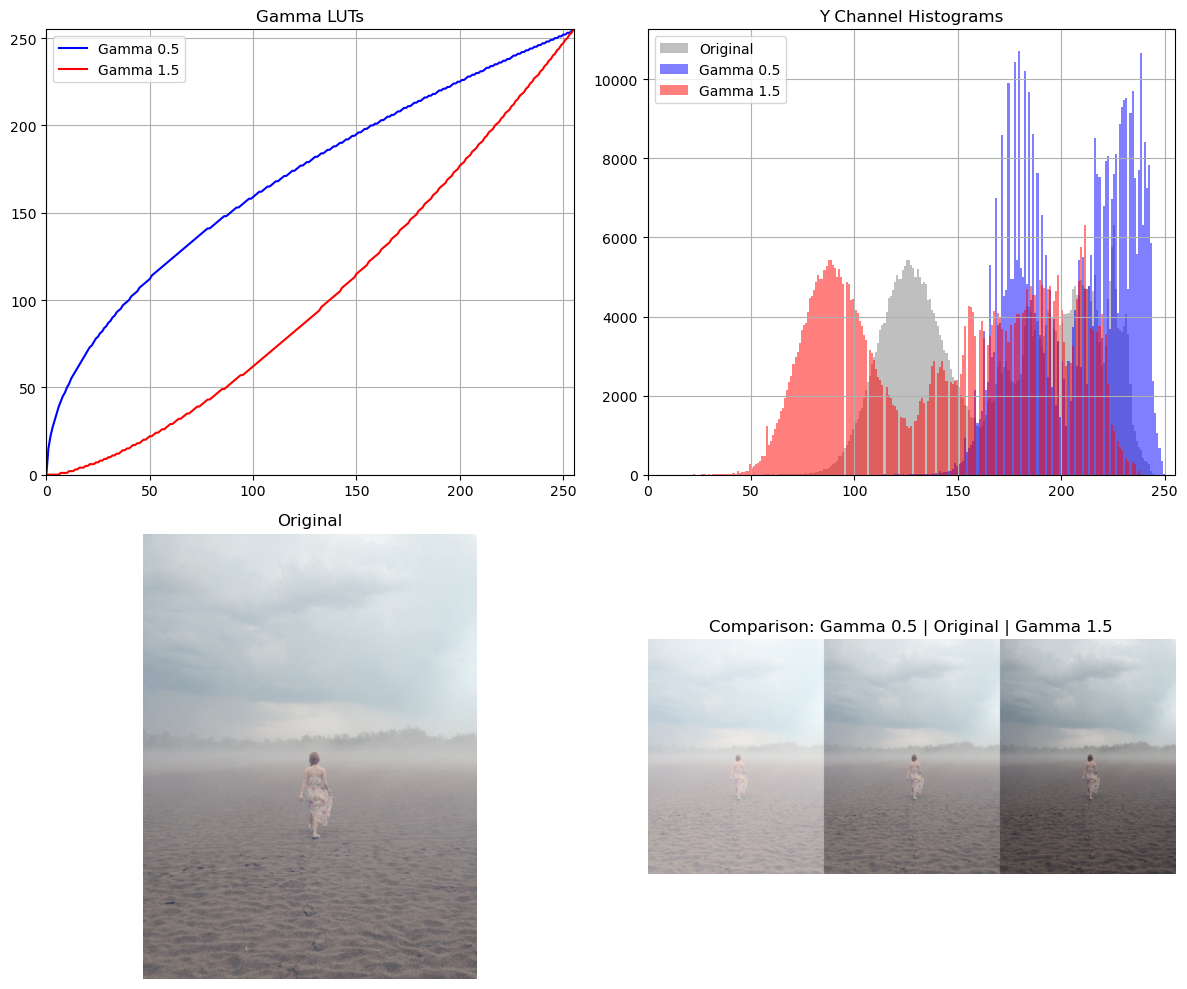

In [3]:
def lut_chart(image, gamma, verbose=False):
    """
    Applies gamma correction to an image and shows the result.

    Args:
        image: Input image in BGR format.
        gamma: Gamma parameter.
        verbose: If True, displays LUT, histogram, and images.

    Returns:
        out_image: Gamma-corrected image in BGR format.
    """
    # Convert image to YCrCb
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)

    # Create gamma LUT
    lut = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)], dtype=np.uint8)

    # Apply LUT to Y channel
    y_gamma = cv2.LUT(y, lut)
    ycrcb_gamma = cv2.merge((y_gamma, cr, cb))
    out_image = cv2.cvtColor(ycrcb_gamma, cv2.COLOR_YCrCb2BGR)

    if verbose:
        plt.figure(figsize=(10, 8))

        # LUT plot
        plt.subplot(2, 2, 1)
        plt.plot(lut, color='r')
        plt.title(f'Gamma LUT (γ={gamma})')
        plt.xlim([0, 255])
        plt.ylim([0, 255])
        plt.grid()

        # Histogram
        plt.subplot(2, 2, 2)
        plt.hist(y_gamma.flatten(), bins=256, range=[0, 256], color='gray')
        plt.title('Histogram (Y channel)')
        plt.xlim([0, 255])
        plt.grid()

        # Original image
        plt.subplot(2, 2, 3)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # Gamma corrected image
        plt.subplot(2, 2, 4)
        plt.imshow(cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Gamma Corrected (γ={gamma})')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    return out_image

# Load image
images_path = './images/'  # Update this
img_bgr = cv2.imread(images_path + 'gamma_2.jpeg')
if img_bgr is None:
    raise FileNotFoundError("Image not found.")

# Generate gamma corrected images
gamma_05 = lut_chart(img_bgr, gamma=0.5)
gamma_15 = lut_chart(img_bgr, gamma=1.5)

# Display all three images in one 2x2 layout
plt.figure(figsize=(12, 10))

# Top row: LUTs
lut_05 = np.array([((i / 255.0) ** 0.5) * 255 for i in range(256)], dtype=np.uint8)
lut_15 = np.array([((i / 255.0) ** 1.5) * 255 for i in range(256)], dtype=np.uint8)

plt.subplot(2, 2, 1)
plt.plot(lut_05, color='blue', label='Gamma 0.5')
plt.plot(lut_15, color='red', label='Gamma 1.5')
plt.title('Gamma LUTs')
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.grid()
plt.legend()

# Histogram comparison
y_orig = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)[:, :, 0]
y_05 = cv2.cvtColor(gamma_05, cv2.COLOR_BGR2YCrCb)[:, :, 0]
y_15 = cv2.cvtColor(gamma_15, cv2.COLOR_BGR2YCrCb)[:, :, 0]

plt.subplot(2, 2, 2)
plt.hist(y_orig.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.5, label='Original')
plt.hist(y_05.flatten(), bins=256, range=[0, 256], color='blue', alpha=0.5, label='Gamma 0.5')
plt.hist(y_15.flatten(), bins=256, range=[0, 256], color='red', alpha=0.5, label='Gamma 1.5')
plt.title('Y Channel Histograms')
plt.xlim([0, 255])
plt.grid()
plt.legend()

# Bottom row: images
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 4)
combined = np.hstack([
            cv2.cvtColor(gamma_05, cv2.COLOR_BGR2RGB),
            cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
            cv2.cvtColor(gamma_15, cv2.COLOR_BGR2RGB)
])
plt.imshow(combined)
plt.title('Comparison: Gamma 0.5 | Original | Gamma 1.5')
plt.axis('off')

plt.tight_layout()
plt.show()

The gamma value of 1.5 gives a better result than the gamma value of 0.5. The gamma value of 1.5 darkens the image which makes it more clear. The gamma value of 0.5 brightens everything even more making it even harder to see the image.

### Problem 4: Edge Detection ###

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interactive, fixed, widgets
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

images_path = './images/'

In [5]:
# Read the image
image = cv2.imread(images_path + 'medical_3.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

# Create threshold value
THRESHOLD = 50

(np.float64(-0.5), np.float64(511.5), np.float64(333.5), np.float64(-0.5))

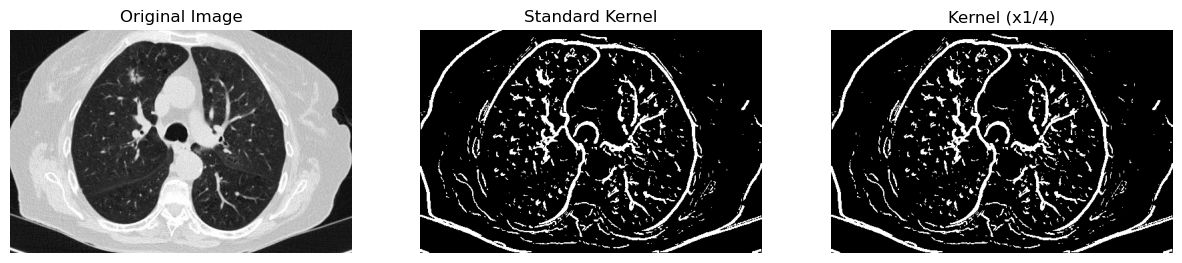

In [6]:
# ----- Normalization Factor -----

# Create sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# Sobel kernel multiplied by normalization factor (1/4)
sobel_x_norm = sobel_x * (1/4)
sobel_y_norm = sobel_y * (1/4)

# Apply the filters using cv2.filter2D
def apply_filter_and_get_edges(image, kx, ky, threshold):
    edges_x = cv2.filter2D(image, -1, sobel_x)
    edges_y = cv2.filter2D(image, -1, sobel_y)
    #calculate magnitude
    magnitude = cv2.magnitude(edges_x.astype(np.float32), edges_y.astype(np.float32))
    # Apply threshold
    _, binary_map = cv2.threshold(magnitude, threshold, 255, cv2.THRESH_BINARY)
    return edges_x, edges_y, binary_map

edge_map_standard = apply_filter_and_get_edges(blurred_image, sobel_x, sobel_y, THRESHOLD)

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(edge_map_standard[2], cmap='gray')
plt.title('Standard Kernel')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(edge_map_standard[2], cmap='gray')
plt.title('Kernel (x1/4)')
plt.axis('off')

Multiplying the kernel by 1/4 turns down the intensity of every edge that's found, making all the calculated edge strengths four times weaker.

(np.float64(-0.5), np.float64(511.5), np.float64(333.5), np.float64(-0.5))

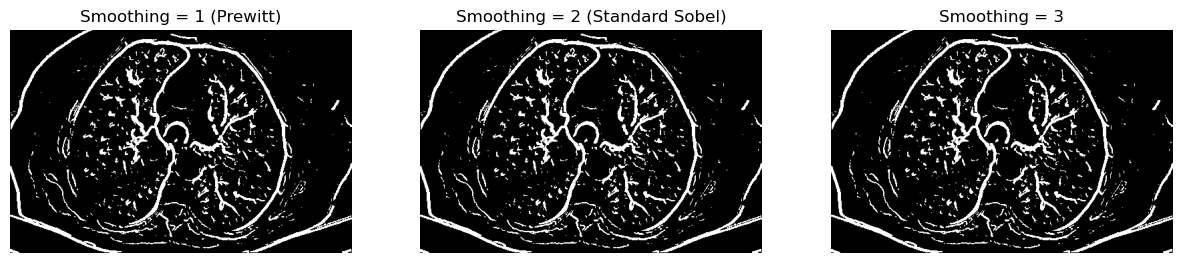

In [7]:
# ----- Smoothing Strength -----

# Kernel with smoothing = 1 
smooth1_h = np.array([[-1, 0, 1], 
                      [-1, 0, 1], 
                      [-1, 0, 1]])
smooth1_v = np.array([[-1, -1, -1], 
                      [0, 0, 0], 
                      [1, 1, 1]])
    
# Kernel with smoothing = 2 (Standard Sobel Operator).
sobel_h = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
sobel_v = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

# Kernel with smoothing = 3. 
smooth3_h = np.array([[-1, 0, 1], 
                      [-3, 0, 3], 
                      [-1, 0, 1]])
smooth3_v = np.array([[-1, -3, -1], 
                      [0, 0, 0], 
                      [1, 3, 1]])

# Run the function for each kernel type
edge_prewitt = apply_filter_and_get_edges(blurred_image, smooth1_h, smooth1_v, THRESHOLD)
edge_sobel_standard = apply_filter_and_get_edges(blurred_image, sobel_h, sobel_v, THRESHOLD)
edge_smooth3 = apply_filter_and_get_edges(blurred_image, smooth3_h, smooth3_v, THRESHOLD)

# Row 2: Smoothing Strength Experiment
plt.subplot(3, 3, 4)
plt.imshow(edge_prewitt[2], cmap='gray')
plt.title('Smoothing = 1 (Prewitt)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(edge_sobel_standard[2], cmap='gray') # Using the standard Sobel as the baseline
plt.title('Smoothing = 2 (Standard Sobel)')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(edge_smooth3[2], cmap='gray')
plt.title('Smoothing = 3')
plt.axis('off')
plt.title('Smoothing = 3')
plt.axis('off')

This central coefficient controls the degree of smoothing applied perpendicular to the edge direction. Lowering the value from 2 to 1 minimizes this smoothing, resulting in sharper edge localization but with a significantly higher sensitivity to image noise. Conversely, increasing the value to 3 enhances the smoothing effect, which produces a cleaner edge map at the cost of thicker edges and a potential loss of fine detail.

(np.float64(-0.5), np.float64(511.5), np.float64(333.5), np.float64(-0.5))

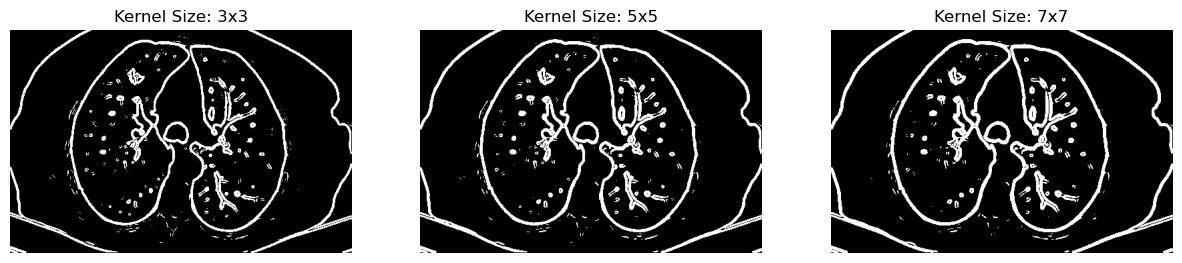

In [8]:
# ----- Kernel Size -----

def apply_sobel_with_ksize(img, k_size, threshold):
    # cv2.CV_64F is used to avoid data loss when calculating gradients
    edges_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=k_size)
    edges_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=k_size)
    
    magnitude = cv2.magnitude(edges_x, edges_y)
    magnitude_normalized = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    _, binary_map = cv2.threshold(magnitude_normalized, threshold, 255, cv2.THRESH_BINARY)
    return binary_map

# Generate edge maps for different kernel sizes
edge_map_k3 = apply_sobel_with_ksize(blurred_image, 3, THRESHOLD)
edge_map_k5 = apply_sobel_with_ksize(blurred_image, 5, THRESHOLD)
edge_map_k7 = apply_sobel_with_ksize(blurred_image, 7, THRESHOLD)

# Row 3: Kernel Size Experiment
plt.subplot(3, 3, 7)
plt.imshow(edge_map_k3, cmap='gray')
plt.title('Kernel Size: 3x3')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(edge_map_k5, cmap='gray')
plt.title('Kernel Size: 5x5')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(edge_map_k7, cmap='gray')
plt.title('Kernel Size: 7x7')
plt.axis('off')

The kernel size determines the scale of the features being detected and the extent of noise suppression. A small 3x3 kernel is sensitive to fine details and provides precise edge localization, but it is also highly susceptible to noise. Increasing the kernel size to 5x5 or 7x7 provides more robust noise reduction by averaging over a larger area, but this comes at the expense of less precise, thicker edges and the potential to overlook smaller image features.